# Introduction to Linear and Non-linear Regression

In this notebook, you will learn the basics of linear and non-linear regression using **pure Python** and **NumPy**, before moving to more advanced libraries like `scipy` and `scikit-learn`.

# Prerequisites

Before running this notebook, make sure you have the required Python packages installed.
We will use:

- **NumPy** for numerical operations
- **Matplotlib** for plotting
- **scikit-learn** for machine learning examples

You can install them using `pip`. Run the following commands in your terminal or in a notebook cell with `!`:

In [ ]:
!pip install numpy matplotlib scikit-learn

## 1. Import necessary libraries

We will mostly use `numpy` and `matplotlib` for plotting.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # for reproducibility

## 2. Generate example data

We will create some data that follows a quadratic function with some noise, so we can practice both linear and non-linear regression.

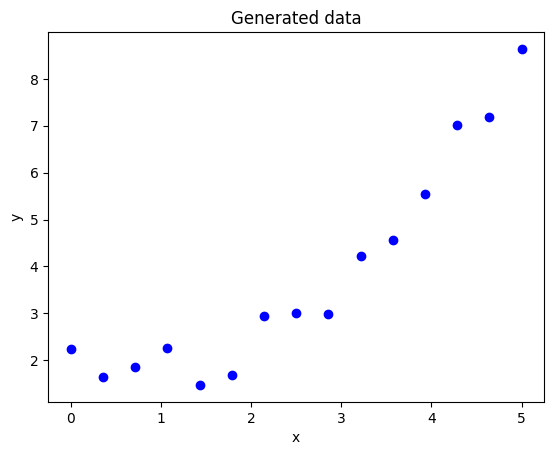

In [4]:
# Generate data
x = np.linspace(0, 5, 15)
y_true = 0.5 * x**2 - x + 2  # true quadratic relationship
y = y_true + np.random.normal(0, 0.5, size=x.shape)  # add some noise

# Display data
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated data')
plt.show()

## 3. Linear Regression from Scratch

The formula for a simple linear regression is:

$$y = wx + b$$

We want to minimize the Mean Squared Error (MSE):

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$

Fill in the formula for MSE in the code below.

Learned parameters: w=0.000, b=0.000
MSE: 0.000, should be 0.834


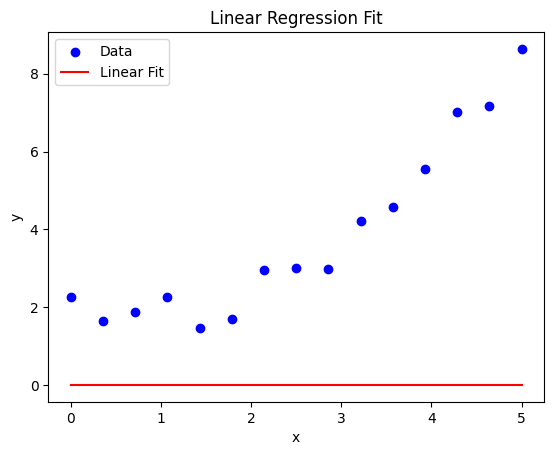

In [6]:
# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.1
num_epochs = 100

n = len(x)

for epoch in range(num_epochs):
    # Predictions
    y_pred = w * x + b

    # Compute loss
    mse_w = 0 # fill in MSE formula
    mse_b = 0

    # Gradients
    dw = (-2/n) * mse_w
    db = (-2/n) * mse_b

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

print(f'Learned parameters: w={w:.3f}, b={b:.3f}')
print(f'MSE: {mse:.3f}, should be 0.834')

# Plot fitted line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, w*x + b, color='red', label='Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

## 4. Non-linear Regression (Quadratic)

We can fit a quadratic model using the same gradient descent approach:

$$y = ax^2 + bx + c$$

Let's implement it with pure NumPy.

**Challenge:** Your task now is to **experiment with different learning rates** (`learning_rate`) and find the one that gives the **lowest Mean Squared Error (MSE)** without causing the parameters to overflow. Remember to fill the MSE loss.

- Try several values, for example: `0.0005`, `0.0001`, `0.01`.
- Observe how the MSE behaves over iterations.
- Notice what happens if the learning rate is too high — the loss may **explode**, and you might even encounter **overflow errors**.
- Try scaling `x` if necessary to make the gradient descent stable.

Learned parameters: a=0.000, b=0.000, c=0.000
MSE: 0.000, mine best was 0.118, try to beat me!


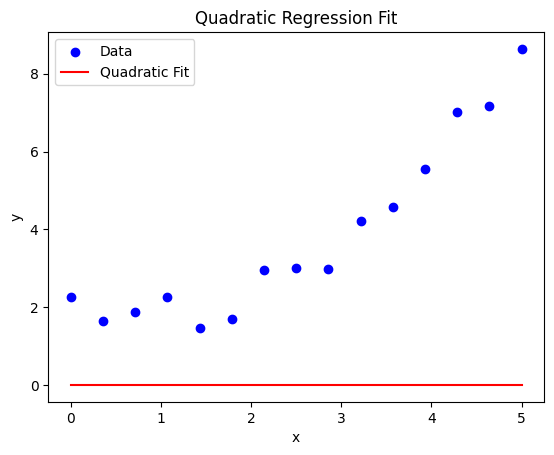

In [7]:
# Initialize parameters
a = 0.0
b = 0.0
c = 0.0
learning_rate = 0.001
num_epochs = 2000

for epoch in range(num_epochs):
    # Predictions
    y_pred = a*x**2 + b*x + c

    # Compute loss
    mse_a = 0 # fill in MSE formula
    mse_b = 0
    mse_c = 0

    # Gradients
    da = (-2/n) * mse_a
    db = (-2/n) * mse_b
    dc = (-2/n) * mse_c

    # Update
    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc

print(f'Learned parameters: a={a:.3f}, b={b:.3f}, c={c:.3f}')
print(f'MSE: {mse:.3f}, mine best was 0.118, try to beat me!')

# Plot quadratic fit
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, a*x**2 + b*x + c, color='red', label='Quadratic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Regression Fit')
plt.legend()
plt.show()

## 5. Learning Rate Exploration

Let's see how different learning rates affect the convergence of linear regression.
We will try a grid of learning rates and see the final MSE.

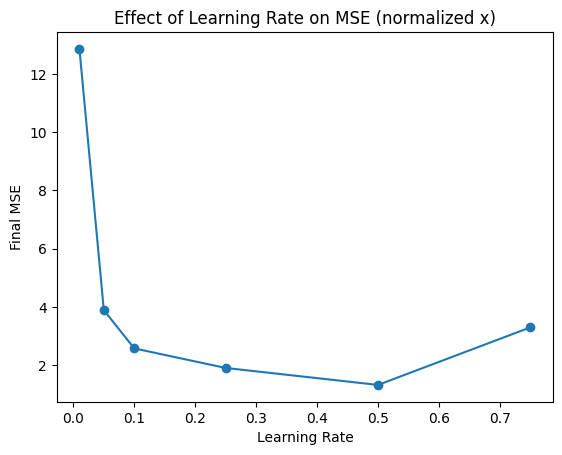

In [8]:
# Normalize x to the range [0,1] to make the effect of different learning rates visible
# This normalization is only needed for visualization purposes in this experiment
# Large x values can make gradient descent unstable for higher learning rates,
# leading to exploding weights and overflow in MSE computation
x_scaled = x / np.max(x)
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
final_mses = []

for lr in learning_rates:
    w = 0.0
    b = 0.0
    for epoch in range(10):
        y_pred = w*x_scaled + b
        dw = (-2/n) * np.sum(x_scaled * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        w -= lr * dw
        b -= lr * db
    mse = np.mean((y - (w*x_scaled + b))**2)
    final_mses.append(mse)

# Plot
plt.plot(learning_rates, final_mses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Final MSE')
plt.title('Effect of Learning Rate on MSE (normalized x)')
plt.show()



## 6. Visual Task with `scikit-learn`

Now let's use `scikit-learn` to fit the same quadratic data, and visualize the fit interactively.

This helps you understand how libraries can simplify regression tasks.

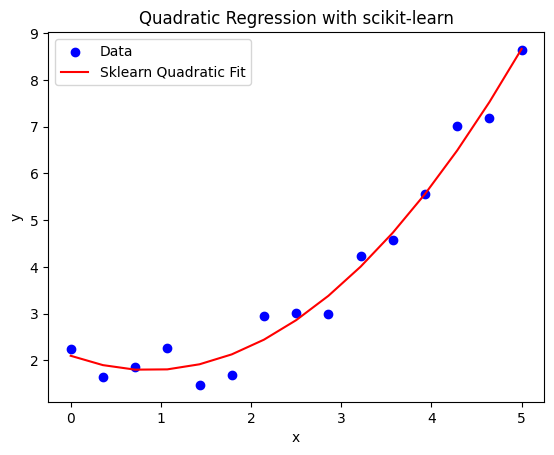

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform data to quadratic features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1,1))

model = LinearRegression()
model.fit(X_poly, y)
y_sklearn = model.predict(X_poly)

plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_sklearn, color='red', label='Sklearn Quadratic Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Regression with scikit-learn')
plt.legend()
plt.show()

## 7. Multivariate Linear Regression (Multiple Features)

So far we have only worked with one input variable (`x`). Now let's try **multiple input variables**.

We will generate a simple dataset with **two features** (`x1` and `x2`) and a linear relationship:

$$y = w_1 x_1 + w_2 x_2 + b$$

Your task is to **write the full training loop** for multivariate linear regression:

- Compute the gradients for all weights and the bias
- Update the weights and bias by subtracting the gradient multiplied by the learning rate
- Experiment with different learning rates to find the one that gives the lowest final MSE

Learned weights: [ 2.09290292 -1.35974792]
Learned bias: 0.284809143517538
Final MSE: 0.170, mine was 0.17


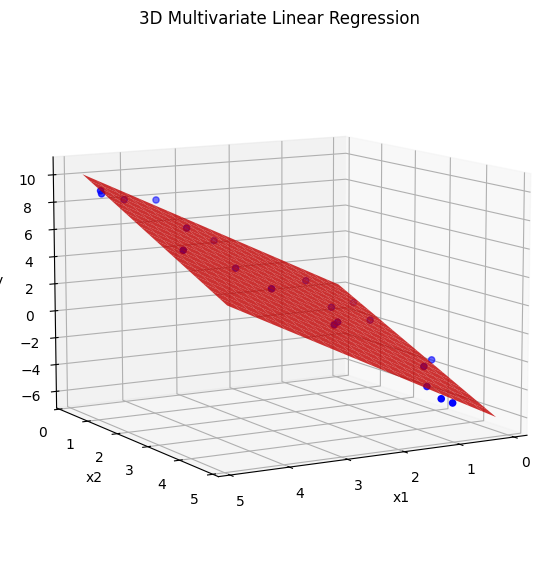

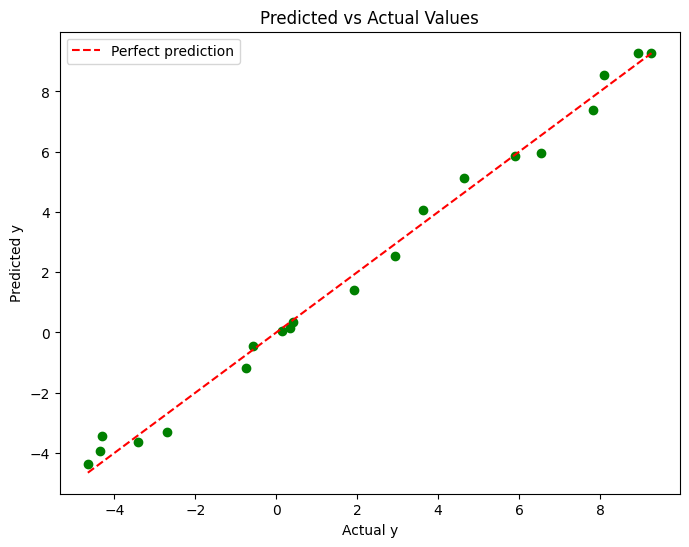

In [46]:
from mpl_toolkits.mplot3d import Axes3D

# Example dataset
np.random.seed(42)
x1 = np.random.uniform(0, 5, 20)
x2 = np.random.uniform(0, 5, 20)
w1_true = 2.0
w2_true = -1.5
b_true = 1.0
y = w1_true*x1 + w2_true*x2 + b_true + np.random.normal(0, 0.5, size=x1.shape)

# Stack features
X = np.column_stack((x1, x2))
n_features = X.shape[1]
n_samples = X.shape[0]

# Gradient descent for multiple features
weights = np.zeros(n_features)
bias = 0.0
learning_rate = 0 # Experiment with different learning rates
num_epochs = 500

for epoch in range(num_epochs):
#     1. Compute predictions: y_pred = ?
#     2. Compute gradients for all weights: dw = ?
#     3. Compute gradient for bias: db = ?
#     4. Update weights by subtracting learning rate * dw
#     5. Update bias by subtracting learning rate * db
#     6. (Optional) Compute MSE for monitoring convergence

final_loss = np.mean((y - (np.dot(X, weights) + bias))**2)

print(f"Learned weights: {weights}")
print(f"Learned bias: {bias}")
print(f"Final MSE: {final_loss:.3f}, mine was 0.17")

# Plots
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, color='blue', label='Actual data')

x1_grid, x2_grid = np.meshgrid(np.linspace(x1.min(), x1.max(), 20),
                               np.linspace(x2.min(), x2.max(), 20))
y_grid = weights[0]*x1_grid + weights[1]*x2_grid + bias
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.8)

ax.view_init(elev=10, azim=60)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Multivariate Linear Regression')
plt.show()


y_pred = np.dot(X, weights) + bias

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect prediction')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()